# Análisis Exploratorio de los Datos
### _Exploratory Data Analysis (EDA)_

In [36]:
# Librerías
import pandas as pd
import numpy as np
# Plott
import matplotlib as plt
import seaborn as sns

In [127]:
# Datasets
aif_tyl = pd.read_csv('Datasets/AccesosaInternetfijoportecnologiaylocalidad_2791751681942669691.csv')
aif_vyp = pd.read_csv('Datasets/AccesosaInternetfijoporvelocidadbajadayprovincia_2791741681942582733.csv')
aif_vyl = pd.read_csv('Datasets/AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171681942647526.csv')
conectividad = pd.read_csv('Datasets/ConectividadalserviciodeInternet_2776151681942723937.csv')
historico_vel = pd.read_csv('Datasets/historico_velocidad_internet.csv')
acceso_tecn = pd.read_csv('Datasets/Internet_Accesos-por-tecnologia.csv')
acceso_vel = pd.read_csv('Datasets/Internet_Accesos-por-velocidad.csv')
internet_baf = pd.read_csv('Datasets/Internet_BAF.csv')
ingresos = pd.read_csv('Datasets/Internet_Ingresos.csv')
penetracion = pd.read_csv('Datasets/Internet_Penetracion.csv')
localidades = pd.read_csv('Datasets/Listadodelocalidadesconconectividadainternet_2750221681942699610.csv')

# Analisis
.head()
.shape
.info()
.describe(include='all')
print('Duplicados :', conectividad.duplicated().sum())
print('Valores nulos :', conectividad.isnull().sum())

In [140]:
def procesar(df,columna):
    for col in columna:
        if df[col].dtype == 'object':
            df[col]=df[col].astype(str).str.replace('- 0','0')
            df[col]=df[col].apply(lambda x: int(x.replace(',','')))
            
        else:
            df[col]=df[col].replace(-0,0)
    return df

## Acceso a Internet Fijo por Tecnología y Localidad

In [80]:
aif_tyl.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [82]:
aif_tyl.shape

(3142, 14)

In [81]:
aif_tyl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [128]:
# Cambio tipo de dato a int
aif_tyl['Total general'] = aif_tyl['Total general'].replace('- 0','0')
aif_tyl['Total general'] = aif_tyl['Total general'].apply(lambda x:int(x.replace('.','')))

In [129]:
aif_tyl.describe(include='all')

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
count,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3.142000e+03,0.0
unique,24,432,2850,2718,724,693,86,706,219,24,12,606,NaN,NaN
top,BUENOS AIRES,General Roca,OTROS,Sin Datos,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,NaN,NaN
freq,716,57,69,72,2016,2295,2760,1743,2537,2089,3131,934,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.529958e+03,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.155495e+04,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.225000e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.510000e+02,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.822500e+02,NaN


In [130]:
print('Duplicados :', aif_tyl.duplicated().sum())
print('Valores nulos :', aif_tyl.isnull().sum())

Duplicados : 0
Valores nulos : Provincia           0
Partido             0
Localidad           0
Link Indec          0
ADSL                0
CABLEMODEM          0
DIAL UP             0
FIBRA OPTICA        0
OTROS               0
SATELITAL           0
WIMAX               0
WIRELESS            0
Total general       0
Unnamed: 13      3142
dtype: int64


In [131]:
# Eliminar columna 13 ya que solo contiene valores nulos
aif_tyl = aif_tyl.drop('Unnamed: 13', axis=1)
aif_tyl

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,- 0,1,- 0,471,- 0,- 0,- 0,- 0,472
3138,TUCUMAN,Trancas,San Pedro de Colalao,90112020,- 0,- 0,- 0,- 0,- 0,- 0,- 0,313,313
3139,TUCUMAN,Trancas,Villa de Trancas,90112030,150,- 0,- 0,- 0,33,- 0,- 0,99,282
3140,TUCUMAN,Yerba Buena,Villa Carmela,90119020,1.725,- 0,- 0,- 0,1,- 0,- 0,97,1823


## Acceso a Internet Fijo por Velocidad de bajada y Provincia

In [93]:
aif_vyp.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,3.0,Buenos Aires,"65,821",19,- 0,- 0,"29,774",192,"4,611",...,"3,163",- 0,"98,387",- 0,2,223,- 0,1,- 0,- 0
1,2022.0,3.0,Capital Federal,"105,477",31,- 0,- 0,451,35,"1,307",...,3,- 0,"30,482",- 0,- 0,8,- 0,- 0,- 0,- 0
2,2022.0,3.0,Catamarca,"2,208",- 0,- 0,- 0,34,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,3.0,Chaco,"3,711",- 0,225,111,234,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,3.0,Chubut,"20,024",8,- 0,- 0,69,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [94]:
aif_vyp.shape

(481, 97)

In [116]:
aif_vyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         480 non-null    float64
 1   Trimestre   480 non-null    float64
 2   Provincia   480 non-null    object 
 3   Otros       480 non-null    object 
 4   0,256 Mbps  480 non-null    object 
 5   0,375 Mbps  480 non-null    object 
 6   0,625 Mbps  480 non-null    object 
 7   0,5 Mbps    480 non-null    object 
 8   0,512 Mbps  480 non-null    object 
 9   0,75 Mbps   480 non-null    object 
 10  1 Mbps      480 non-null    object 
 11  1,2 Mbps    480 non-null    object 
 12  1,25 Mbps   480 non-null    object 
 13  1,5 Mbps    480 non-null    object 
 14  2 Mbps      480 non-null    object 
 15  2,2 Mbps    480 non-null    object 
 16  2,5 Mbps    481 non-null    object 
 17  6,7 Mbps    480 non-null    object 
 18  3 Mbps      480 non-null    object 
 19  3,2 Mbps    480 non-null    o

In [132]:
print('Duplicados :', aif_vyp.duplicated().sum())
print('Valores nulos :', aif_vyp.isnull().sum())

Duplicados : 0
Valores nulos : Año           1
Trimestre     1
Provincia     1
Otros         1
0,256 Mbps    1
             ..
80 Mbps       1
81 Mbps       1
83 Mbps       1
82 Mbps       1
86 Mbps       1
Length: 97, dtype: int64


In [133]:
# Localizo fila con valores nulos
aif_vyp[aif_vyp.isna().any(axis=1)]

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# Elimino fila con valores nulos
aif_vyp=aif_vyp.dropna()

In [135]:
aif_vyp.shape

(480, 97)

In [100]:
aif_vyp.columns

Index(['Año', 'Trimestre', 'Provincia', 'Otros', '0,256 Mbps', '0,375 Mbps',
       '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
       '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
       '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
       '8 Mbps', '9 Mbps', '10 Mbps', '10,6 Mbps', '11 Mbps', '12 Mbps',
       '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps',
       '19 Mbps', '20 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps',
       '25 Mbps', '25,1 Mbps', '25,11 Mbps', '25,5 Mbps', '26 Mbps', '28 Mbps',
       '29 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps',
       '36 Mbps', '37 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps',
       '45 Mbps', '46 Mbps', '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps',
       '51 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps',
       '59 Mbps', '60 Mbps', '61 Mbp

In [137]:
lista = ('Otros','0,256 Mbps', '0,375 Mbps',
       '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
       '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
       '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
       '8 Mbps', '9 Mbps', '10 Mbps', '10,6 Mbps', '11 Mbps', '12 Mbps',
       '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps',
       '19 Mbps', '20 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps',
       '25 Mbps', '25,1 Mbps', '25,11 Mbps', '25,5 Mbps', '26 Mbps', '28 Mbps',
       '29 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps',
       '36 Mbps', '37 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps',
       '45 Mbps', '46 Mbps', '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps',
       '51 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps',
       '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '63 Mbps', '64 Mbps',
       '65 Mbps', '66 Mbps', '67 Mbps', '68 Mbps', '70 Mbps', '71 Mbps',
       '75 Mbps', '77 Mbps', '78 Mbps', '80 Mbps', '81 Mbps', '83 Mbps',
       '82 Mbps', '86 Mbps')
procesar(aif_vyp,lista)

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,3.0,Buenos Aires,65821,19,0,0,29774,192,4611,...,3163,0,98387,0,2,223,0,1,0,0
1,2022.0,3.0,Capital Federal,105477,31,0,0,451,35,1307,...,3,0,30482,0,0,8,0,0,0,0
2,2022.0,3.0,Catamarca,2208,0,0,0,34,37,0,...,0,0,0,0,0,0,0,0,0,0
3,2022.0,3.0,Chaco,3711,0,225,111,234,2,0,...,0,0,0,0,0,0,0,0,0,0
4,2022.0,3.0,Chubut,20024,8,0,0,69,32,836,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2017.0,4.0,Santa Cruz,0,0,0,0,68,0,0,...,0,0,0,0,0,0,0,0,0,0
476,2017.0,4.0,Santa Fe,14119,0,0,0,3109,0,7637,...,0,0,0,0,0,0,0,0,0,0
477,2017.0,4.0,Santiago Del Estero,0,0,0,0,41,0,909,...,0,0,0,0,0,0,0,0,0,0
478,2017.0,4.0,Tierra Del Fuego,0,0,0,0,6,0,282,...,0,0,0,0,0,0,0,0,0,0


In [138]:
aif_vyp.describe(include='all')

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
count,480.000000,480.0000,480,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0
unique,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019.750000,2.5000,NaN,8673.487500,3.202083,5.156250,2.543750,2554.958333,38.531250,1354.495833,...,45.520833,0.008333,1340.604167,0.008333,0.045833,24.731250,0.008333,0.022917,0.033333,0.0
std,1.480563,1.1192,NaN,15049.506678,11.199780,33.703648,16.627133,17892.324254,75.023219,5291.737366,...,379.596610,0.128965,9834.415240,0.128965,0.326274,183.593749,0.091001,0.163137,0.179693,0.0
min,2017.000000,1.0000,NaN,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2018.750000,1.7500,NaN,489.500000,0.000000,0.000000,0.000000,20.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2020.000000,2.5000,NaN,3987.000000,0.000000,0.000000,0.000000,47.000000,10.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2021.000000,3.2500,NaN,10479.250000,0.000000,0.000000,0.000000,82.250000,56.250000,301.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [146]:
aif_vyp

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,3.0,Buenos Aires,65821,19,0,0,29774,192,4611,...,3163,0,98387,0,2,223,0,1,0,0
1,2022.0,3.0,Capital Federal,105477,31,0,0,451,35,1307,...,3,0,30482,0,0,8,0,0,0,0
2,2022.0,3.0,Catamarca,2208,0,0,0,34,37,0,...,0,0,0,0,0,0,0,0,0,0
3,2022.0,3.0,Chaco,3711,0,225,111,234,2,0,...,0,0,0,0,0,0,0,0,0,0
4,2022.0,3.0,Chubut,20024,8,0,0,69,32,836,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2017.0,4.0,Santa Cruz,0,0,0,0,68,0,0,...,0,0,0,0,0,0,0,0,0,0
476,2017.0,4.0,Santa Fe,14119,0,0,0,3109,0,7637,...,0,0,0,0,0,0,0,0,0,0
477,2017.0,4.0,Santiago Del Estero,0,0,0,0,41,0,909,...,0,0,0,0,0,0,0,0,0,0
478,2017.0,4.0,Tierra Del Fuego,0,0,0,0,6,0,282,...,0,0,0,0,0,0,0,0,0,0


## Acceso a Internet Fijo por Velocidad y Localidad

In [139]:
aif_vyl.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
aif_vyl.shape

(3098, 83)

In [142]:
aif_vyl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       956 non-null    object 
 5   0,256 mbps  29 non-null     float64
 6   0,375 mbps  1 non-null      float64
 7   0,5 mbps    643 non-null    object 
 8   0,512 mbps  524 non-null    float64
 9   0,625 mbps  1 non-null      float64
 10  0,75 mbps   284 non-null    object 
 11  1 mbps      931 non-null    object 
 12  1,25 mbps   1 non-null      float64
 13  1,5 mbps    16 non-null     object 
 14  2 mbps      741 non-null    object 
 15  2,2 mbps    1 non-null      float64
 16  2,5 mbps    3 non-null      float64
 17  3 mbps      1388 non-null   object 
 18  3,3 mbps    1 non-null      float64
 19  3,5 mbps    373 non-null   

In [143]:
print('Duplicados :', aif_vyp.duplicated().sum())
print('Valores nulos :', aif_vyp.isnull().sum())

Duplicados : 0
Valores nulos : Año           0
Trimestre     0
Provincia     0
Otros         0
0,256 Mbps    0
             ..
80 Mbps       0
81 Mbps       0
83 Mbps       0
82 Mbps       0
86 Mbps       0
Length: 97, dtype: int64


In [144]:
aif_vyl.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros',
       '0,256 mbps', '0,375 mbps', '0,5 mbps', '0,512 mbps', '0,625 mbps',
       '0,75 mbps', '1 mbps', '1,25 mbps', '1,5 mbps', '2 mbps', '2,2 mbps',
       '2,5 mbps', '3 mbps', '3,3 mbps', '3,5 mbps', '4 mbps', '4,5 mbps',
       '5 mbps', '6 mbps', '6,4 mbps', '7 mbps', '7,5 mbps', '8 mbps',
       '9 mbps', '10 mbps', '11 mbps', '12 mbps', '13 mbps', '14 mbps',
       '15 mbps', '16 mbps', '17 mbps', '18 mbps', '19 mbps', '20 mbps',
       '21 mbps', '22 mbps', '23 mbps', '24 mbps', '25 mbps', '25,1 mbps',
       '25,11 mbps', '25,5 mbps', '26 mbps', '30 mbps', '31 mbps', '32 mbps',
       '34 mbps', '35 mbps', '36 mbps', '38 mbps', '39 mbps', '40 mbps',
       '41 mbps', '45 mbps', '46 mbps', '49 mbps', '50 mbps', '55 mbps',
       '58 mbps', '59 mbps', '60 mbps', '61 mbps', '62 mbps', '64 mbps',
       '65 mbps', '66 mbps', '70 mbps', '75 mbps', '78 mbps', '80 mbps',
       '82 mbps', '83 mbps', '85 mbps', '90 m

In [ ]:
lista = ('Otros','0,256 mbps', '0,375 mbps', '0,5 mbps', '0,512 mbps', '0,625 mbps',
       '0,75 mbps', '1 mbps', '1,25 mbps', '1,5 mbps', '2 mbps', '2,2 mbps',
       '2,5 mbps', '3 mbps', '3,3 mbps', '3,5 mbps', '4 mbps', '4,5 mbps',
       '5 mbps', '6 mbps', '6,4 mbps', '7 mbps', '7,5 mbps', '8 mbps',
       '9 mbps', '10 mbps', '11 mbps', '12 mbps', '13 mbps', '14 mbps',
       '15 mbps', '16 mbps', '17 mbps', '18 mbps', '19 mbps', '20 mbps',
       '21 mbps', '22 mbps', '23 mbps', '24 mbps', '25 mbps', '25,1 mbps',
       '25,11 mbps', '25,5 mbps', '26 mbps', '30 mbps', '31 mbps', '32 mbps',
       '34 mbps', '35 mbps', '36 mbps', '38 mbps', '39 mbps', '40 mbps',
       '41 mbps', '45 mbps', '46 mbps', '49 mbps', '50 mbps', '55 mbps',
       '58 mbps', '59 mbps', '60 mbps', '61 mbps', '62 mbps', '64 mbps',
       '65 mbps', '66 mbps', '70 mbps', '75 mbps', '78 mbps', '80 mbps',
       '82 mbps', '83 mbps', '85 mbps', '90 mbps', '92 mbps', '95 mbps',
       '100 mbps')
procesar(aif_vyl,lista)

## Conectividad
Analizar

In [3]:
conectividad.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"


In [7]:
conectividad.shape

(4312, 16)

In [6]:
conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [5]:
conectividad.describe(include='all')

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
count,4312,4312,4312,4.312000e+03,4312,4312,4312,4312,4312,4312,4312,4312,4312,4.300000e+03,4312,4312
unique,24,444,3912,NaN,2,2,2,2,2,2,2,2,2,NaN,4260,4259
top,BUENOS AIRES,General Roca,San Pedro,NaN,--,--,--,--,--,SI,SI,--,SI,NaN,"-28,5555816291232","-67,1592836516078"
freq,901,85,12,NaN,3179,3436,3909,2866,3233,2242,2162,2432,2574,NaN,4,4
mean,NaN,NaN,NaN,8.693093e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.909872e+07,NaN,NaN
std,NaN,NaN,NaN,3.821544e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.939305e+07,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000010e+06,NaN,NaN
25%,NaN,NaN,NaN,1.160000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.009104e+07,NaN,NaN
50%,NaN,NaN,NaN,5.755000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.401053e+07,NaN,NaN
75%,NaN,NaN,NaN,3.202000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.612602e+07,NaN,NaN


In [10]:
print('Duplicados :', conectividad.duplicated().sum())
print('Valores nulos :', conectividad.isnull().sum())

Duplicados : 0
Valores nulos : Provincia         0
Partido           0
Localidad         0
Poblacion         0
ADSL              0
CABLEMODEM        0
DIALUP            0
FIBRAOPTICA       0
SATELITAL         0
WIRELESS          0
TELEFONIAFIJA     0
3G                0
4G                0
link             12
Latitud           0
Longitud          0
dtype: int64


## Histótico Velocidad Internet

In [147]:
historico_vel.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,"62,46",Jul-Sept 2022
1,2022,2,"58,44",Abr-Jun 2022
2,2022,1,"55,11",Ene-Mar 2022
3,2021,4,"52,34",Oct-Dic 2021
4,2021,3,"48,46",Jul-Sept 2021


In [148]:
historico_vel.shape

(35, 4)

In [149]:
historico_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     35 non-null     int64 
 1   Trimestre               35 non-null     int64 
 2   Mbps (Media de bajada)  35 non-null     object
 3   Trimestre.1             35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [156]:
# Cambiar tipo de dato (object) de la columna Mbps a float
historico_vel['Mbps (Media de bajada)'] = historico_vel['Mbps (Media de bajada)'].str.replace(',','.').astype(float)

In [163]:
# Cambio nombre de columna Trimestre.1 a Periodo
historico_vel = historico_vel.rename(columns={'Trimestre.1':'Periodo'})

In [164]:
historico_vel.describe(include='all')

,Año,Trimestre,Mbps (Media de bajada),Periodo
count,35.000000,35.000000,35.000000,35
unique,NaN,NaN,NaN,35
top,NaN,NaN,NaN,Jul-Sept 2022
freq,NaN,NaN,NaN,1
mean,2017.885714,2.457143,21.827143,NaN
std,2.564135,1.120474,19.230717,NaN
min,2014.000000,1.000000,3.620000,NaN
25%,2016.000000,1.500000,5.250000,NaN
50%,2018.000000,2.000000,13.850000,NaN
75%,2020.000000,3.000000,39.495000,NaN


In [159]:
print('Duplicados :', historico_vel.duplicated().sum())
print('Valores nulos :', historico_vel.isnull().sum())

Duplicados : 0
Valores nulos : Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64


## Internet Accesos por Tecnología

In [160]:
acceso_tecn.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


In [161]:
acceso_tecn.shape

(35, 9)

In [173]:
acceso_tecn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [176]:
# Cambio tipo de dato(object y float) a int en columnas:
acceso_tecn['ADSL'] = acceso_tecn['ADSL'].apply(lambda x:int(x.replace('.','')))
acceso_tecn['Cablemodem'] = acceso_tecn['Cablemodem'].apply(lambda x:int(x.replace('.','')))
acceso_tecn['Fibra óptica'] = acceso_tecn['Fibra óptica'].apply(lambda x:int(x.replace('.','')))
acceso_tecn['Wireless'] = acceso_tecn['Wireless'].astype(int)
acceso_tecn['Otros'] = acceso_tecn['Otros'].astype(int)
acceso_tecn['Total'] = acceso_tecn['Total'].apply(lambda x:int(x.replace('.','')))

In [178]:
acceso_tecn.describe(include='all')

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01,35
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jul-Sept 2022
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,2017.885714,2.457143,3.040425e+06,4.122601e+06,7.390627e+05,247.857143,146.971429,8.297800e+06,NaN
std,2.564135,1.120474,8.354122e+05,1.225277e+06,7.861772e+05,174.383813,85.900587,1.399611e+06,NaN
min,2014.000000,1.000000,1.395277e+06,2.407330e+06,1.391870e+05,70.000000,54.000000,6.398398e+06,NaN
25%,2016.000000,1.500000,2.279711e+06,2.966749e+06,1.679880e+05,85.000000,62.500000,7.057455e+06,NaN
50%,2018.000000,2.000000,3.557216e+06,4.038141e+06,2.262850e+05,194.000000,100.000000,8.110444e+06,NaN
75%,2020.000000,3.000000,3.723156e+06,5.132233e+06,1.138802e+06,394.500000,247.500000,9.260442e+06,NaN


In [179]:
print('Duplicados :', acceso_tecn.duplicated().sum())
print('Valores nulos :', acceso_tecn.isnull().sum())

Duplicados : 0
Valores nulos : Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64


## Internet Accesos por Velocidad

In [180]:
acceso_vel.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [181]:
acceso_vel.shape

(840, 12)

In [182]:
acceso_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [185]:
# Convertir el tipo de dato (object y float) en int
acceso_vel['HASTA 512 kbps'] = acceso_vel['HASTA 512 kbps'].astype(int)
acceso_vel['+ 512 Kbps - 1 Mbps'] = acceso_vel['+ 512 Kbps - 1 Mbps'].astype(int)
acceso_vel['+ 1 Mbps - 6 Mbps'] = acceso_vel['+ 1 Mbps - 6 Mbps'].apply(lambda x:int(x.replace('.','')))
acceso_vel['+ 6 Mbps - 10 Mbps'] = acceso_vel['+ 6 Mbps - 10 Mbps'].astype(int)
acceso_vel['+ 10 Mbps - 20 Mbps'] = acceso_vel['+ 10 Mbps - 20 Mbps'].astype(int)
acceso_vel['+ 20 Mbps - 30 Mbps'] = acceso_vel['+ 20 Mbps - 30 Mbps'].astype(int)
acceso_vel['+ 30 Mbps'] = acceso_vel['+ 30 Mbps'].apply(lambda x:int(x.replace('.','')))
acceso_vel['Total'] = acceso_vel['Total'].apply(lambda x:int(x.replace('.','')))

In [186]:
acceso_tecn.describe(include='all')

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01,35
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jul-Sept 2022
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,2017.885714,2.457143,3.040425e+06,4.122601e+06,7.390627e+05,247.857143,146.971429,8.297800e+06,NaN
std,2.564135,1.120474,8.354122e+05,1.225277e+06,7.861772e+05,174.383813,85.900587,1.399611e+06,NaN
min,2014.000000,1.000000,1.395277e+06,2.407330e+06,1.391870e+05,70.000000,54.000000,6.398398e+06,NaN
25%,2016.000000,1.500000,2.279711e+06,2.966749e+06,1.679880e+05,85.000000,62.500000,7.057455e+06,NaN
50%,2018.000000,2.000000,3.557216e+06,4.038141e+06,2.262850e+05,194.000000,100.000000,8.110444e+06,NaN
75%,2020.000000,3.000000,3.723156e+06,5.132233e+06,1.138802e+06,394.500000,247.500000,9.260442e+06,NaN


In [183]:
print('Duplicados :', acceso_vel.duplicated().sum())
print('Valores nulos :', acceso_vel.isnull().sum())

Duplicados : 0
Valores nulos : Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64


## Internet BAF

In [188]:
internet_baf.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [190]:
internet_baf.shape

(35, 6)

In [191]:
internet_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [195]:
print('Duplicados :', internet_baf.duplicated().sum())
print('Valores nulos :', internet_baf.isnull().sum())

Duplicados : 0
Valores nulos : Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64


In [192]:
# Convertir tipo de dato (object y float) a int
internet_baf['Banda ancha fija'] = internet_baf['Banda ancha fija'].apply(lambda x: int(x.replace('.', '')))
internet_baf['Dial up'] = internet_baf['Dial up'].astype(int)
internet_baf['Total'] = internet_baf['Total'].apply(lambda x: int(x.replace('.', '')))

In [194]:
internet_baf.describe(include='all')

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
count,35.000000,35.000000,3.500000e+01,35.000000,3.500000e+01,35
unique,NaN,NaN,NaN,NaN,NaN,35
top,NaN,NaN,NaN,NaN,NaN,Jul-Sept 2022
freq,NaN,NaN,NaN,NaN,NaN,1
mean,2017.885714,2.457143,8.274417e+06,22.914286,8.297800e+06,NaN
std,2.564135,1.120474,1.408774e+06,10.068505,1.399611e+06,NaN
min,2014.000000,1.000000,6.362108e+06,9.000000,6.398398e+06,NaN
25%,2016.000000,1.500000,7.024946e+06,12.000000,7.057455e+06,NaN
50%,2018.000000,2.000000,8.083533e+06,26.000000,8.110444e+06,NaN
75%,2020.000000,3.000000,9.244537e+06,32.000000,9.260442e+06,NaN


## Internet Ingresos

In [196]:
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [197]:
ingresos.shape

(35, 4)

In [198]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [199]:
print('Duplicados :', ingresos.duplicated().sum())
print('Valores nulos :', ingresos.isnull().sum())

Duplicados : 0
Valores nulos : Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64


In [200]:
# Cambiar tipo de dato a int de la columna Ingresos
ingresos['Ingresos (miles de pesos)']=ingresos['Ingresos (miles de pesos)'].apply(lambda x: int(x.replace('.', '')))

In [210]:
ingresos.describe(include='all')

,Año,Trimestre,Ingresos (miles de pesos),Periodo
count,35,35.000000,3.500000e+01,35
unique,9,NaN,NaN,35
top,2021,NaN,NaN,Jul-Sept 2022
freq,4,NaN,NaN,1
mean,NaN,2.457143,2.058845e+07,NaN
std,NaN,1.120474,1.774214e+07,NaN
min,NaN,1.000000,2.984054e+06,NaN
25%,NaN,1.500000,6.235543e+06,NaN
50%,NaN,2.000000,1.431947e+07,NaN
75%,NaN,3.000000,3.204996e+07,NaN


## Penetración

In [25]:
penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [26]:
penetracion.shape

(840, 4)

In [27]:
penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [28]:
# Convierto el tipo de dato (object) de la columna 'Acceso por cada 100 hogares' a float
penetracion['Accesos por cada 100 hogares']= penetracion['Accesos por cada 100 hogares'].apply(lambda x: float(x.replace(',','.')))

In [29]:
penetracion.describe(include='all')

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
count,840.000000,840.000000,840,840.000000
unique,NaN,NaN,24,NaN
top,NaN,NaN,Buenos Aires,NaN
freq,NaN,NaN,35,NaN
mean,2017.885714,2.457143,NaN,49.065750
std,2.528745,1.105009,NaN,23.151885
min,2014.000000,1.000000,NaN,9.350000
25%,2016.000000,1.000000,NaN,32.107500
50%,2018.000000,2.000000,NaN,45.900000
75%,2020.000000,3.000000,NaN,61.865000


In [30]:
print('Duplicados :', penetracion.duplicated().sum())
print('Valores nulos :', penetracion.isnull().sum())

Duplicados : 0
Valores nulos : Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64


<AxesSubplot: xlabel='Accesos por cada 100 hogares', ylabel='Count'>

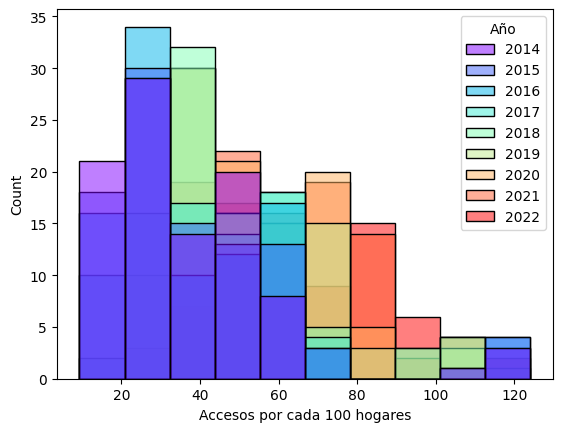

In [63]:
sns.histplot(x='Accesos por cada 100 hogares',data=penetracion, bins=10,hue='Año', palette='rainbow')

<AxesSubplot: xlabel='Accesos por cada 100 hogares', ylabel='Provincia'>

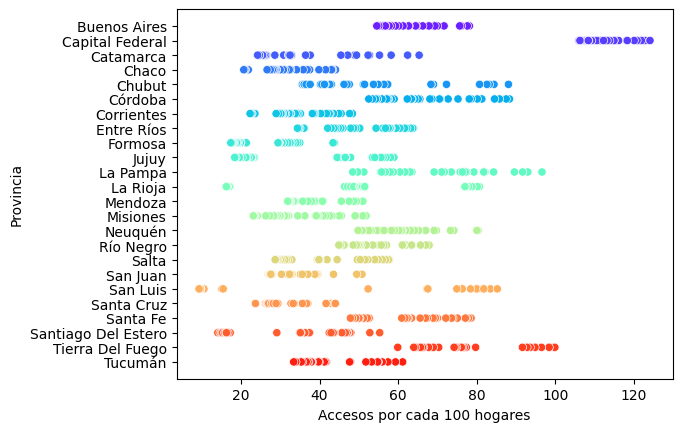

In [59]:
sns.scatterplot(data=penetracion, x='Accesos por cada 100 hogares', y='Provincia', hue='Provincia', legend=None, palette = 'rainbow')

## Localidades

In [64]:
localidades.head()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,--,--,--,--,SI,SI,--,--,--
1,BUENOS AIRES,Bahía Blanca,Villa Espora,--,--,--,--,--,--,--,--,--
2,BUENOS AIRES,Balcarce,Balcarce,SI,SI,SI,SI,SI,SI,SI,SI,--
3,BUENOS AIRES,Balcarce,Los Pinos,--,--,--,--,--,--,SI,SI,--
4,BUENOS AIRES,Balcarce,Napaleofú,--,--,--,SI,SI,SI,SI,SI,--


In [65]:
localidades.shape

(4312, 12)

In [66]:
localidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      4312 non-null   object
 1   Partido        4312 non-null   object
 2   Localidad      4312 non-null   object
 3   ADSL           4312 non-null   object
 4   CABLEMODEM     4312 non-null   object
 5   DIALUP         4312 non-null   object
 6   FIBRAOPTICA    4312 non-null   object
 7   4G             4312 non-null   object
 8   3G             4312 non-null   object
 9   TELEFONIAFIJA  4312 non-null   object
 10  WIRELESS       4312 non-null   object
 11  SATELITAL      4312 non-null   object
dtypes: object(12)
memory usage: 404.4+ KB


In [67]:
localidades.describe(include='all')

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
count,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,--,--,--,--,SI,--,SI,SI,--
freq,901,85,12,3179,3436,3909,2866,2574,2432,2162,2242,3233


In [68]:
print('Duplicados :', localidades.duplicated().sum())
print('Valores nulos :', localidades.isnull().sum())

Duplicados : 2
Valores nulos : Provincia        0
Partido          0
Localidad        0
ADSL             0
CABLEMODEM       0
DIALUP           0
FIBRAOPTICA      0
4G               0
3G               0
TELEFONIAFIJA    0
WIRELESS         0
SATELITAL        0
dtype: int64


In [76]:
duplicados = localidades[localidades.duplicated()]
print(duplicados)

         Provincia    Partido     Localidad ADSL CABLEMODEM DIALUP   
651        TUCUMAN  Cruz Alta      Lastenia   --         --     --  \
3366  BUENOS AIRES   La Plata  ruta del sol   SI         --     --   

     FIBRAOPTICA  4G  3G TELEFONIAFIJA WIRELESS SATELITAL  
651           --  SI  SI            --       --        --  
3366          --  SI  SI            --       --        --  


In [77]:
localidades[650:652]

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
650,TUCUMAN,Cruz Alta,Lastenia,--,--,--,--,SI,SI,--,--,--
651,TUCUMAN,Cruz Alta,Lastenia,--,--,--,--,SI,SI,--,--,--


In [79]:
localidades[3365:3367]

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
3365,BUENOS AIRES,La Plata,ruta del sol,SI,--,--,--,SI,SI,--,--,--
3366,BUENOS AIRES,La Plata,ruta del sol,SI,--,--,--,SI,SI,--,--,--
